In [1]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [2]:
in_shape = (128, 128, 1)

In [3]:
# sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=in_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# fully connected layers
model.add(Dense(128, activation='relu'))

# summarize model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [8]:
# list convolutional layers
for layer in model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    kernels, biases = layer.get_weights()
    print(layer.name, kernels.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)
conv2d_2 (3, 3, 64, 128)


In [9]:
model_layer_idx = 0
kernels, biases = model.layers[model_layer_idx].get_weights()
print(kernels.shape) # (3, 3, 1, 32) -> 3x3 , 1 channel, 32 filters

(3, 3, 1, 32)


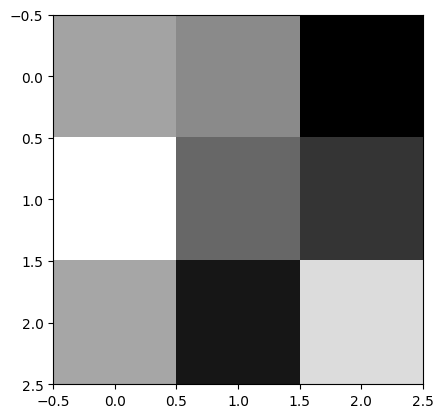

In [12]:
k_min, k_max = kernels.min(), kernels.max()
kernels = (kernels - k_min) / (k_max - k_min)
kernels_idx = 0
kernels_i = kernels[:, :, 0, kernels_idx]
plt.imshow(kernels_i, cmap='gray')

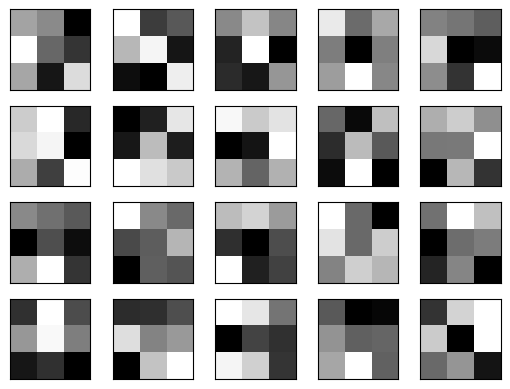

In [13]:
nplot = 20
for i in range(nplot):
    f = kernels[:, :, 0, i]
    ax = plt.subplot(4, 5, i+1)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f, cmap='gray')